In [81]:
from pysbjupyter.pysb_models.lopez_embedded import model
import pysbjupyter as viz
import numpy as np
from pysb.simulator import ScipyOdeSimulator

In [82]:
pars = np.load('calibrated_6572pars.npy')
pars0 = pars[0]
tspan = np.linspace(0, 20000, 100)
sim = ScipyOdeSimulator(model, tspan, compiler='python').run(param_values=pars0)

In [83]:
viz.species_dynamics_view(sim)

pysbViz(data=<pysb.simulator.base.SimulationResult object at 0x1525f705c0>, layout_name='preset', type_of_viz=…

In [84]:
from scipy.optimize import curve_fit

def sig_apop(t, f, td, ts):
    """

    Parameters
    ----------
    t : list-like
        Time variable in the function
    f : float
        is the fraction cleaved at the end of the reaction
    td : float
        is the delay period between TRAIL addition and half-maximal substrate cleavage
    ts : float
        is the switching time between initial and complete effector substrate  cleavage

    Returns
    -------

    """
    return f - f / (1 + np.exp((t - td) / (4 * ts)))

#     xdata: list-like,
#         x-axis data points (usually time span of the simulation)
#     ydata: list-like,
#         y-axis data points (usually concentration of species in time)

c = curve_fit(f=sig_apop, xdata=tspan, ydata=sim.dataframe['cPARP'].values, p0=[10,10,10])


In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
pars_for_kd = np.copy(pars0)
pars_for_kd[56] = pars_for_kd[56] * 0
sim_kd = ScipyOdeSimulator(model, tspan).run(param_values=pars_for_kd)

2019-02-04 13:14:24.250 - pysb.simulator.scipyode - WARNING - [pysbjupyter.pysb_models.lopez_embedded] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing a package for compiling the ODEs to C code: 'weave' (recommended for Python 2) or 'cython' (recommended for Python 3). This warning can be suppressed by specifying compiler_mode='python'.


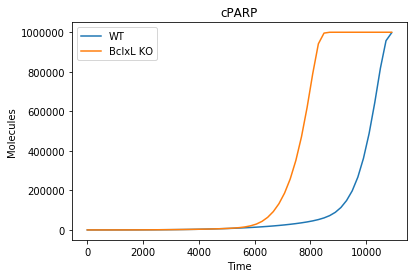

In [87]:
plt.plot(tspan[:55], sim.dataframe['cPARP'].values[:55], label='WT')
plt.plot(tspan[:55], sim_kd.dataframe['cPARP'].values[:55], label='BclxL KO')
plt.xlabel('Time')
plt.ylabel('Molecules')
plt.title('cPARP')
plt.legend()
plt.savefig('cparp_ko.png', dpi=500, bbox_inches='tight')